In [1]:
!pip install opendatasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import opendatasets as od

In [3]:
od.download('https://www.kaggle.com/datasets/niharika41298/yoga-poses-dataset')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: deepanadak
Your Kaggle Key: ··········


100%|██████████| 288M/288M [00:15<00:00, 20.0MB/s]


In [4]:
!pip install os
!pip install tensorflow
!pip install pandas
!pip install numpy
!pip install opencv-python

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement os (from versions: none)
ERROR: No matching distribution found for os
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
import numpy as np
import pandas as pd
import cv2
import os
from sklearn.metrics import classification_report, confusion_matrix
import random
from tensorflow.keras.preprocessing import image
from tensorflow.keras.utils import to_categorical
from keras.applications.mobilenet import MobileNet, preprocess_input
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout, Dense,BatchNormalization, Flatten, MaxPool2D
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau, Callback
from keras.layers import Conv2D, Reshape
from tensorflow.keras.utils import Sequence
from keras.backend import epsilon
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
import warnings
warnings.filterwarnings('ignore')

In [6]:
Class = os.listdir("/content/yoga-poses-dataset/DATASET/TRAIN")
Class

['warrior2', 'plank', 'goddess', 'tree', 'downdog']

In [7]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

dir = '/content/yoga-poses-dataset/DATASET/TRAIN'
classlist=sorted(os.listdir(dir))
filepaths = []
labels=[]
for klass in classlist:
    classpath=os.path.join(dir, klass)
    flist=os.listdir(classpath)        
    for f in flist:
        fpath=os.path.join(classpath,f)
        filepaths.append(fpath)
        labels.append(klass)
Fseries=pd.Series(filepaths, name='filepaths')
Lseries=pd.Series(labels, name='labels')        
df=pd.concat([Fseries, Lseries], axis=1)
Fseries.head()


0    /content/yoga-poses-dataset/DATASET/TRAIN/down...
1    /content/yoga-poses-dataset/DATASET/TRAIN/down...
2    /content/yoga-poses-dataset/DATASET/TRAIN/down...
3    /content/yoga-poses-dataset/DATASET/TRAIN/down...
4    /content/yoga-poses-dataset/DATASET/TRAIN/down...
Name: filepaths, dtype: object

In [8]:
IMAGE_SIZE = 224
CHANNELS = 3

train_datagen = ImageDataGenerator(
        rescale = 1./255,
        horizontal_flip = True,
        rotation_range = 10
)
train_generator = train_datagen.flow_from_directory(
    '/content/yoga-poses-dataset/DATASET/TRAIN',
    target_size = (IMAGE_SIZE,IMAGE_SIZE),
    batch_size = 32,
    class_mode = 'categorical',
)

Found 1081 images belonging to 5 classes.


In [9]:
test_datagen = ImageDataGenerator(
        rescale = 1./255,
        horizontal_flip = True,
        rotation_range = 10
)
test_generator = test_datagen.flow_from_directory(
    '/content/yoga-poses-dataset/DATASET/TEST',
    target_size = (IMAGE_SIZE,IMAGE_SIZE),
    batch_size = 32,
    class_mode = 'categorical',
)

Found 470 images belonging to 5 classes.


In [10]:
from tensorflow.keras.applications.vgg16 import VGG16

In [11]:
input_shape = (IMAGE_SIZE,IMAGE_SIZE,CHANNELS)
n_classes = 3
pre_trained_model = VGG16(
    input_shape = input_shape,
    include_top = False,
    weights = "imagenet"
)

for layer in pre_trained_model.layers:
    layer.trainable = False

pre_trained_model.summary()


58889256/58889256 [==============================] - 3s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                              

In [15]:

model = tf.keras.models.Sequential([
    pre_trained_model,
    
    Flatten(),    
    Dense(256,activation="relu"),
    BatchNormalization(),
    Dropout(0.5),
    Dense(5, activation='softmax')
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten_1 (Flatten)         (None, 25088)             0         
                                                                 
 dense_2 (Dense)             (None, 256)               6422784   
                                                                 
 batch_normalization_1 (Batc  (None, 256)              1024      
 hNormalization)                                                 
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_3 (Dense)             (None, 5)                 1285      
                                                      

In [16]:
model.compile(
            optimizer="adam",
            loss='categorical_crossentropy',
            metrics = ['acc']
)

In [18]:
!pip install pillow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [19]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [20]:
history = model.fit_generator(
            train_generator,
            validation_data=test_generator,
            epochs=8
)

Epoch 1/8
34/34 [==============================] - 49s 1s/step - loss: 0.3894 - acc: 0.8677 - val_loss: 0.6376 - val_acc: 0.8128
Epoch 2/8
34/34 [==============================] - 41s 1s/step - loss: 0.2658 - acc: 0.9288 - val_loss: 0.3477 - val_acc: 0.9043
Epoch 3/8
34/34 [==============================] - 41s 1s/step - loss: 0.1865 - acc: 0.9436 - val_loss: 0.1452 - val_acc: 0.9574
Epoch 4/8
34/34 [==============================] - 46s 1s/step - loss: 0.1440 - acc: 0.9630 - val_loss: 0.1374 - val_acc: 0.9574
Epoch 5/8
34/34 [==============================] - 42s 1s/step - loss: 0.0852 - acc: 0.9833 - val_loss: 0.1083 - val_acc: 0.9638
Epoch 6/8
34/34 [==============================] - 41s 1s/step - loss: 0.0735 - acc: 0.9769 - val_loss: 0.1499 - val_acc: 0.9638
Epoch 7/8
34/34 [==============================] - 41s 1s/step - loss: 0.0679 - acc: 0.9861 - val_loss: 0.1667 - val_acc: 0.9532
Epoch 8/8
34/34 [==============================] - 41s 1s/step - loss: 0.0630 - acc: 0.9843 - val

**Training and Validation loss and Accuracy**

Text(0.5, 1.0, 'Training and validation loss')

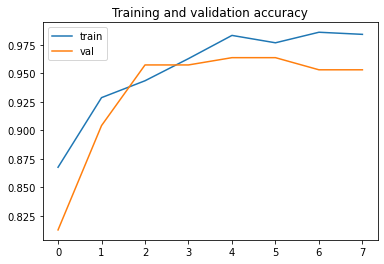

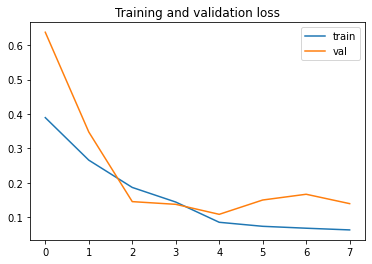

In [21]:
import matplotlib.pyplot as plt

acc      = history.history['acc']
val_acc  = history.history['val_acc']
loss     = history.history['loss']
val_loss = history.history['val_loss']

epochs   = range(len(acc))


# Plot training and validation accuracy per epoch
plt.plot(epochs,acc)
plt.plot(epochs,val_acc)
plt.title('Training and validation accuracy')
plt.legend(['train','val'])
plt.figure()

# Plot training and validation loss per epoch
plt.plot(epochs,loss)
plt.plot(epochs,val_loss)
plt.legend(['train','val'])
plt.title('Training and validation loss')

In [23]:
train_loss, train_acc = model.evaluate(train_generator)
test_loss, test_acc   = model.evaluate(test_generator)
print("final train accuracy = {:.2f} , Test accuracy = {:.2f}".format(train_acc*100, test_acc*100))

15/15 [==============================] - 17s 1s/step - loss: 0.1398 - acc: 0.9532
final train accuracy = 99.63 , Test accuracy = 95.32
